# Baseline Random Forest Model

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
df_test = pd.read_parquet("BU4707_250hz.parquet")
df_train = pd.read_parquet("PC6771_250hz.parquet")

X_train = df_train[['x', 'y', 'z']]
X_test = df_test[['x', 'y', 'z']]
y_train = df_train[['TAC_class']]
y_test = df_test[['TAC_class']]

In [6]:
features = ['x_mean', 'y_mean', 'z_mean', 'mag_mean', 'x_std', 'y_std', 'z_std', 'mag_std', 
            'x_median', 'y_median', 'z_median', 'mag_median', 'x_crossing', 'y_crossing', 'z_crossing', 
            'x_max', 'y_max', 'z_max', 'mag_max', 'time_entropy', 'frequnecy_entropy', 'spectral_centroid',]

df_test = pd.read_parquet("BU4707_features.parquet")
df_train = pd.read_parquet("PC6771_features.parquet")

X_train = df_train[features]
X_test = df_test[features]
y_train = df_train[['TAC_class']]
y_test = df_test[['TAC_class']]

In [14]:
# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

/var/folders/kk/v1dq6w817kb25skcwjv3tgyw0000gn/T/ipykernel_25718/4052469552.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Accuracy: 0.8409402546523017


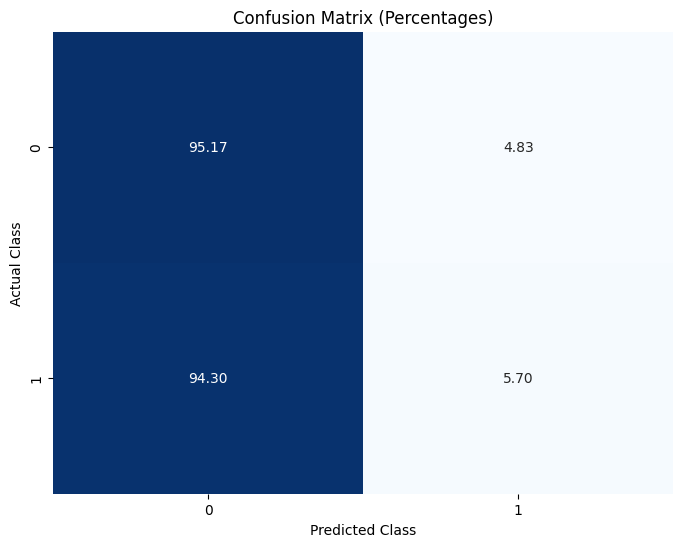

In [13]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Percentages)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()